In [1]:
from Framework_V2.core.config import CaseConfig, GridShape
from Framework_V2.core.geometry import FinnTubedHX
from Framework_V2.models import Frostmodell_V1
from Framework_V2.runtime.simulator import Simulator
from Framework_V2.visualisation import plot
from CoolProp.HumidAirProp import HAPropsSI

# Case Definieren

In [2]:
T_a = 16
T_w = -10
P = 103500
RH = 0.8
v_a = 1

cfg = CaseConfig(
    # air data
    T_a = T_a,          # °C temperature air
    v_a = v_a,          # m/s velocity air
    p_a = P,            # Pa pressure air
    RH = RH,            # relative humidity air
    w_amb = HAPropsSI('W','T',T_a+273.15,'P',P,'R', RH),          # kg/kg water vapor moisture content
    rho_amb = 1.2,      # kg/m^3 density air
    v_kin = 1.5e-5,     # m^2/s kinematic viscosity air
    lam = 0.025,        # W/mK heat conduction coefficient air
    c_p_a = 1000,       # J/kgK heat capacity air
    D_std = 2.2e-5,     # m^2/s water vapor diffusion coefficient
    C = 900,            # 1/s empirical water vapor absorbed coefficient
    isv = 2830000,      # J/kg latent heat of desublimation

    # refrigerant data
    T_w = T_w,          # °C wall temperature

    # ice data
    rho_i = 920,        # kg/m^3 frost density (solid)
    h_sub= 334,         # kJ/kg latent heat of ablimation for water vapor

    # numerics
    t_end = 6,      # s endtime
    dt = 0.1              # s time step
)

geom = FinnTubedHX(
    n_fin = 4,           # -
    l_fin = 0.01,          # m
    d_fin = 0.002,    # m
    fin_pitch = 0.01,          # m
    d_tube_a = 0.01,          # m
    tube_thickness = 0.002       # m
)

gs = GridShape(
    nx = 100,
    nr = 100,
    ntheta = 2#90
)

# Simulation laufen lassen

In [3]:
sim = Simulator(fields=("t","s_e"))
results = sim.run(cfg, geom, gs, Frostmodell_V1)

Time Step: 0 s 	 Inner Iterations: 4 	 w: 2.839e-06 	 T: 5.985e-09
Time Step: 0.1 s 	 Inner Iterations: 1 	 w: 3.349e-08 	 T: 9.274e-02
Time Step: 0.2 s 	 Inner Iterations: 3 	 w: 2.682e-06 	 T: 4.787e-09
Time Step: 0.30000000000000004 s 	 Inner Iterations: 3 	 w: 3.584e-05 	 T: 3.555e-07
Time Step: 0.4 s 	 Inner Iterations: 3 	 w: 4.672e-06 	 T: 7.936e-08
Time Step: 0.5 s 	 Inner Iterations: 2 	 w: 5.694e-05 	 T: 9.535e-07
Time Step: 0.6 s 	 Inner Iterations: 3 	 w: 6.607e-06 	 T: 1.055e-07
Time Step: 0.7 s 	 Inner Iterations: 3 	 w: 1.140e-05 	 T: 1.895e-07
Time Step: 0.7999999999999999 s 	 Inner Iterations: 3 	 w: 1.829e-05 	 T: 3.508e-07
Time Step: 0.8999999999999999 s 	 Inner Iterations: 3 	 w: 2.726e-05 	 T: 5.857e-07
Time Step: 0.9999999999999999 s 	 Inner Iterations: 3 	 w: 3.586e-05 	 T: 8.559e-07
Time Step: 1.0999999999999999 s 	 Inner Iterations: 4 	 w: 4.255e-06 	 T: 1.581e-07
Time Step: 1.2 s 	 Inner Iterations: 4 	 w: 5.285e-06 	 T: 2.284e-07
Time Step: 1.3 s 	 Inner Iter

# Resultate speichen

In [4]:
result_file = "results_test_edge.csv"
results.to_csv(result_file)

# Resultate plotten

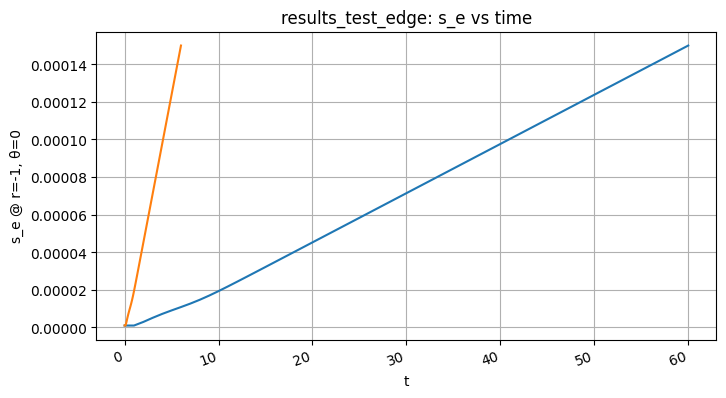

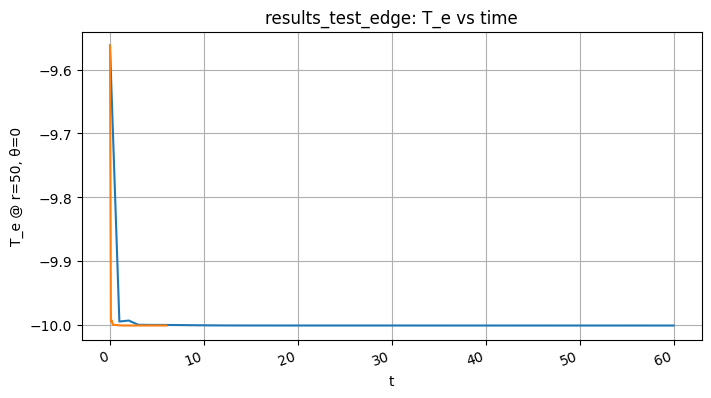

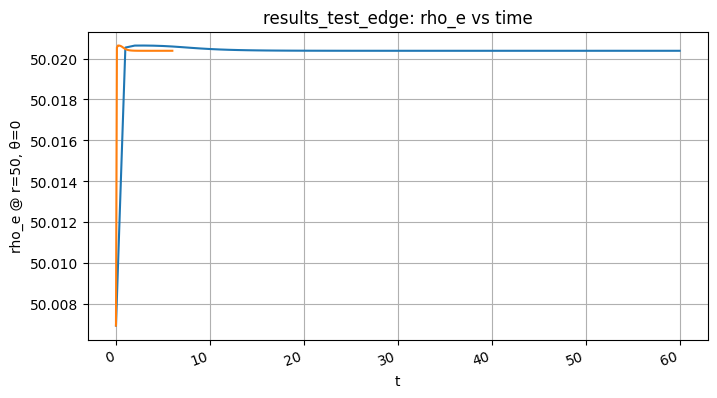

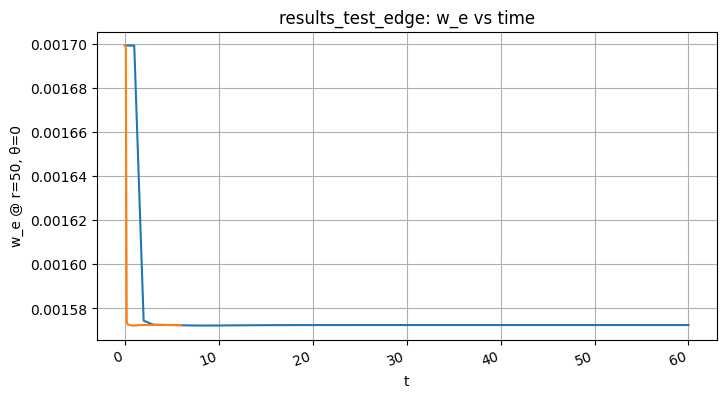

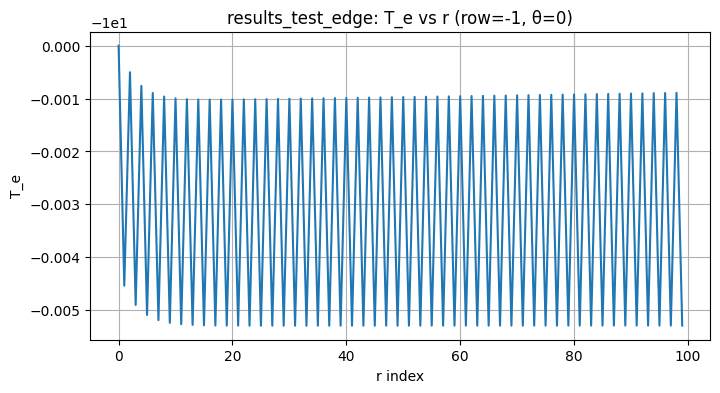

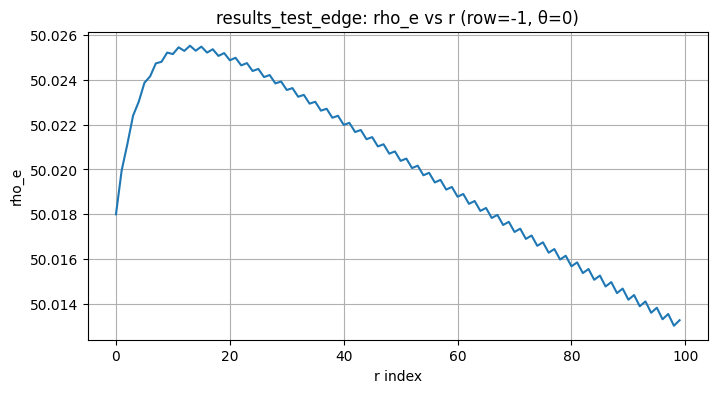

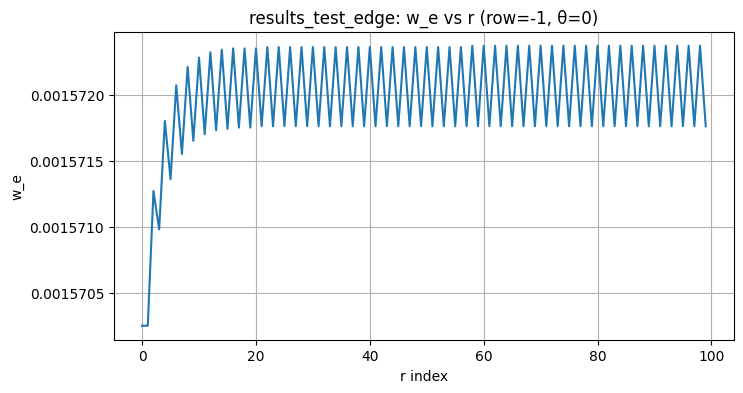

In [6]:
plot_r = 50
plot_theta = 0
plot_time = -1

plot.plot_vs_time("results_test_edge.csv", var="s_e", theta_idx=plot_theta, save=False)
plot.plot_vs_time("results_test_edge.csv", var="T_e", r_idx=plot_r, theta_idx=plot_theta, save=False)
plot.plot_vs_time("results_test_edge.csv", var="rho_e", r_idx=plot_r, theta_idx=plot_theta, save=False)
plot.plot_vs_time("results_test_edge.csv", var="w_e", r_idx=plot_r, theta_idx=plot_theta, save=False)

plot.plot_vs_r("results_test_edge.csv", var="T_e", row=plot_time, theta_idx=plot_theta, save=False)
plot.plot_vs_r("results_test_edge.csv", var="rho_e", row=plot_time, theta_idx=plot_theta, save=False)
plot.plot_vs_r("results_test_edge.csv", var="w_e", row=plot_time, theta_idx=plot_theta, save=False)